<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/5.PraFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Library dari python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [26]:
#load semua data kedalam variabel (terinfeksi_data), yang di load hny nma_file
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/')

#mencetak/menampilkan dahulu berapa jumlah(len) data didalam var terinfeksi_data
print(len(terinfeksi_data))

#untuk mencetak/menampilkan 10 data terakhir
#[10:] utk 10 data pertama
print(terinfeksi_data[:10]) #the output we get are the .png files

#load semua data kedalam variabel (terinfeksi_data)
tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi/')
print('\n')
print(tidakTerinfeksi_data[:10]) #:10 itu output dari 10 file citra

500
['C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png']


['C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_9.png', 'C1_thinF_IMG_20150604_104722_cell_60.png', 'C1_thinF_IMG_20150604_104722_cell_81.png', 'C1_thinF_IMG_20150604_104722_cell_79.png', 'C1_thinF_IMG_20150604_104722_cell_66.png', 'C1_thinF_IMG_20150604_104722_cell_73.png', 'C1_thinF_IMG_20150604_104722_cell_123.png', 'C1_thinF_IMG_20150604_104722_cell_115.png', 'C1_thinF_IMG_20150604_104722_cell_164.png']


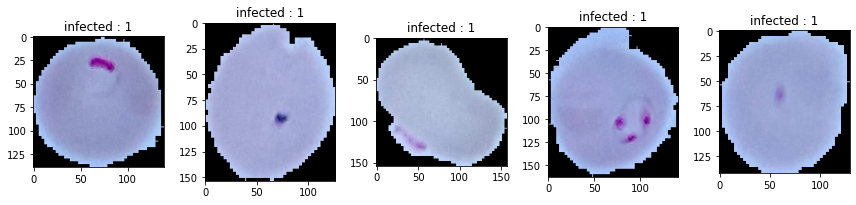

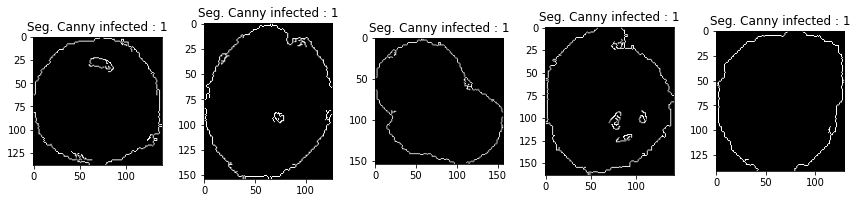

In [0]:
#Tahap Visualisasi

#merubah skala gambar yang akan ditampilkan
plt.figure(figsize = (12,12))

#
for i in range(5):

    #
    plt.subplot(1, 5, i+1)
    
    #
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    
    #
    plt.imshow(img,cmap='gray')
    
    #
    plt.title('infected : 1')
    
    #
    plt.tight_layout()

#
plt.show()

In [0]:
#Tahap Segmentasi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()
plt.show()

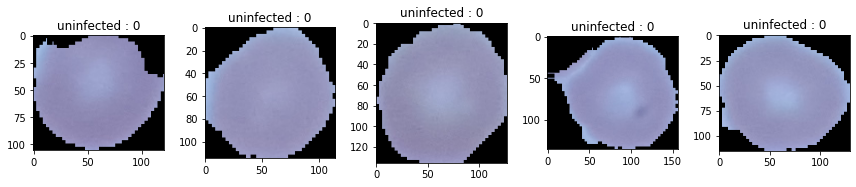

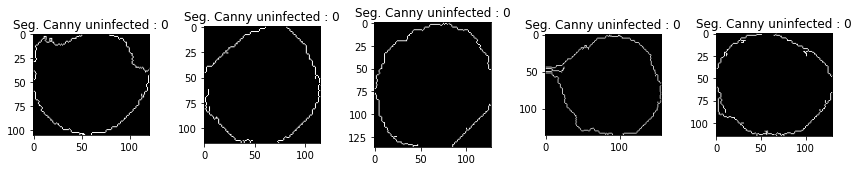

In [0]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

[['h1' 'h2' 'h3' 'h4' 'h5' 'h6' 'h7' 'target']]


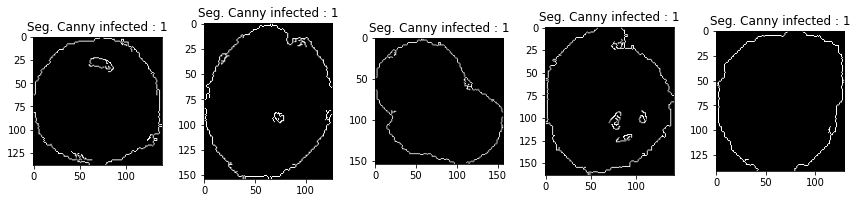

array([['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'target'],
       ['0.028240007522808225', '6.1033171806028585e-06',
        '3.7492135494104917e-07', '3.6013891372179327e-07',
        '8.78894915050484e-14', '4.204438908475632e-10',
        '9.893444903984919e-14', '1.0'],
       ['0.02983163602763015', '4.362678441143921e-05',
        '1.5602747215304648e-08', '8.149174489082133e-08',
        '9.155612574831397e-16', '5.382504376342664e-10',
        '-2.7578297749685096e-15', '1.0'],
       ['0.03623001970260657', '6.467113756210264e-05',
        '1.284771933318099e-06', '1.9061843065071775e-07',
        '-8.632118987319462e-14', '1.3386691023492205e-10',
        '3.80425050387674e-14', '1.0'],
       ['0.023174180497951263', '8.211288153258351e-06',
        '6.963300249330595e-08', '3.197778747504381e-07',
        '-2.6869029011875715e-14', '1.2397622614432079e-10',
        '3.943401151966644e-14', '1.0'],
       ['0.04223760833416436', '1.3948770262685792e-05',
        '9.1037787

In [0]:
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])
print(x)
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()
plt.show()
x

In [0]:
#save to file csv in drive

np.savetxt("malariax.csv", x ,fmt='%s', delimiter="," )

In [0]:
#load dataset - untuk dikelola
dataset = pd.read_csv('malariax.csv')
print (len(dataset))

#dataset.Type.value_counts().plot(kind='bar')
print (dataset)

5
         h1        h2            h3  ...            h6            h7  target
0  0.028240  0.000006  3.749214e-07  ...  4.204439e-10  9.893445e-14     1.0
1  0.029832  0.000044  1.560275e-08  ...  5.382504e-10 -2.757830e-15     1.0
2  0.036230  0.000065  1.284772e-06  ...  1.338669e-10  3.804251e-14     1.0
3  0.023174  0.000008  6.963300e-08  ...  1.239762e-10  3.943401e-14     1.0
4  0.042238  0.000014  9.103779e-08  ...  3.167181e-10  6.731306e-15     1.0

[5 rows x 8 columns]
